In [113]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as smtsa
import random

In [114]:
Fs = 500;            # Sampling frequency                    
T = 1/Fs;             # Sampling period       
L = 1000;             # Length of signal
t = np.arange(0, L)*T     # Time vector

In [115]:
S = 2.0*np.sin(2*np.pi*t) + 0.7*np.sin(2*np.pi*5*t)
for i in range(len(S)):
    S[i] += random.random()-0.5

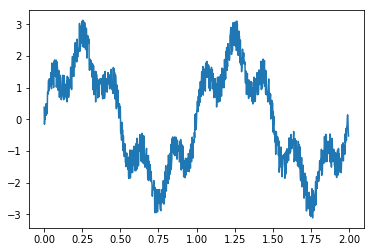

In [116]:
plt.plot(t,S)

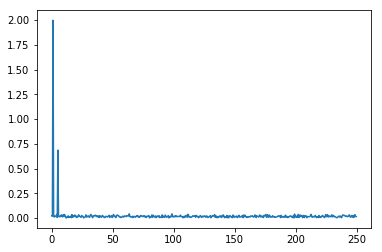

In [117]:
four = np.fft.fft(S)
half = int(len(four)/2)
four = 2*np.absolute(four[:half]/L)
f = Fs*np.arange(0, L/2)/L
plt.plot(f, four)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] [0.02150827 0.01816928 1.99875115 0.02281133 0.01033698 0.02021228
 0.01785775 0.01597417 0.03665003 0.00545481]


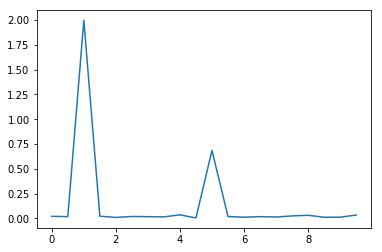

In [118]:
plt.plot(f[0:20], four[0:20])
print(f[0:10], four[0:10])

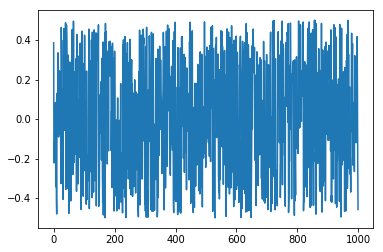

In [119]:
y = S - 2.0*np.sin(2*np.pi*t) - 0.7*np.sin(2*np.pi*5*t)
plt.plot(y)

In [134]:
fit = smtsa.arima_model.ARMA(y, (4, 2)).fit(display=False)

In [135]:
length = len(y)
z = sm.tsa.arma_generate_sample(ar=np.append(1, -fit.arparams), 
                                ma=np.append(1, fit.maparams), 
                                nsample=length, 
                                sigma=np.sqrt(fit.sigma2))

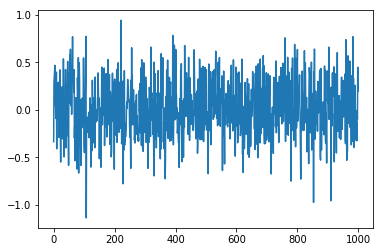

In [136]:
plt.plot(z)

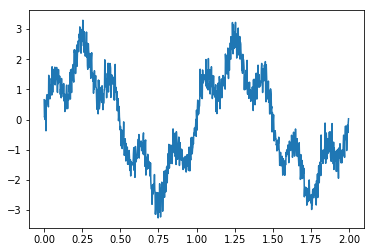

In [123]:
S1 = z + 2.0*np.sin(2*np.pi*t) + 0.7*np.sin(2*np.pi*5*t)
plt.plot(t,S1)

In [124]:
four_map = {}
i = 0
for i in range(len(four)):
    if four[i] > 0.5:
        four_map[f[i]] = four[i]
print(four_map)

{1.0: 1.9987511491626964, 5.0: 0.6860525330015516}


In [125]:
S2 = S
for t1,v in four_map.items():
    S2 = S2 - v*np.sin(2*np.pi*t*t1)

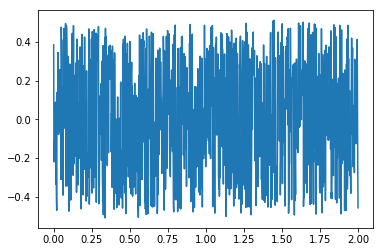

In [127]:
plt.plot(t,S2)

In [137]:
for t1,v in four_map.items():
    S2 = S2 + v*np.sin(2*np.pi*t*t1)

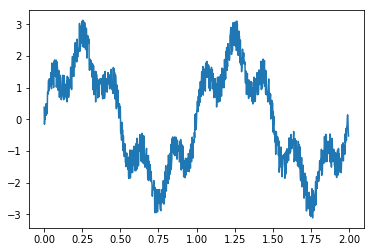

In [139]:
plt.plot(t,S2)